# Step 3: Exploratory Data Analysis (EDA)

## 🎯 Objectives
- Visualize distributions of numerical and categorical variables.
- Explore relationships between key features (price, discount, rating, popularity).
- Detect correlations among numerical variables.
- Identify potential outliers.

---

## 📝 Steps

### 1. Load the processed dataset
We will load `data/processed/amazon_sales_processed.csv` into a DataFrame.

### 2. Univariate Analysis
- Distribution plots for numerical variables.
- Count plots for categorical variables (`category_main`).

### 3. Bivariate Analysis
- Correlation heatmap.
- Scatterplots of:
  - `discounted_price_num` vs. `rating_num`
  - `discount_amount` vs. `popularity_score`
  - `discount_pct_num` vs. `rating_num`

### 4. Outlier Detection
- Boxplots for `actual_price_num`, `discounted_price_num`, and `rating_num`.

### 5. Insights
- Summarize patterns observed in price, discount, and ratings.

---

✅ After this step, we’ll have a solid understanding of data distributions and relationships, which will guide **Feature Selection & Modeling**.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
sns.set(style="whitegrid")


In [2]:
# Load cleaned dataset
df = pd.read_csv("../data/processed/amazon_sales_processed.csv")

# Preview
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,actual_price_num,discounted_price_num,discount_pct_num,rating_num,rating_count_num,category_main,discount_pct_calc,discount_pct_diff,discount_amount,popularity_score
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,1099.0,399.0,64.0,4.2,24269.0,Computers&Accessories,63.694268,0.305732,700.0,42.407384
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,349.0,199.0,43.0,4.0,43994.0,Computers&Accessories,42.979943,0.020057,150.0,42.767325
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,1899.0,199.0,90.0,3.9,7928.0,Computers&Accessories,89.520800,0.479200,1700.0,35.015301
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,699.0,329.0,53.0,4.2,94363.0,Computers&Accessories,52.932761,0.067239,370.0,48.110643
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,399.0,154.0,61.0,4.2,16905.0,Computers&Accessories,61.403509,0.403509,245.0,40.888780


### Data Statistics

In [3]:
# Summary statistics
df.describe()


,actual_price_num,discounted_price_num,discount_pct_num,rating_num,rating_count_num,discount_pct_calc,discount_pct_diff,discount_amount,popularity_score
count,1465.000000,1465.000000,1465.000000,1464.000000,1463.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,5444.990635,3125.310874,47.691468,4.096585,18295.541353,47.684924,0.209244,2319.679761,34.105872
std,10874.826864,6944.304394,21.635905,0.291674,42753.864952,21.636267,0.160957,4604.473790,9.068357
min,39.000000,39.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,800.000000,325.000000,32.000000,4.000000,1186.000000,32.001280,0.061061,371.000000,28.464701
50%,1650.000000,799.000000,50.000000,4.100000,5179.000000,50.016672,0.184061,800.000000,35.154374
75%,4295.000000,1999.000000,63.000000,4.300000,17336.500000,62.885714,0.353362,1953.000000,40.456632
max,139900.000000,77990.000000,94.000000,5.000000,426973.000000,94.118824,0.500000,61910.000000,57.043705


### Check missing values

In [4]:
# Check missing values
df.isnull().sum()


product_id              0
product_name            0
category                0
discounted_price        0
actual_price            0
discount_percentage     0
rating                  0
rating_count            2
about_product           0
user_id                 0
user_name               0
review_id               0
review_title            0
review_content          0
img_link                0
product_link            0
actual_price_num        0
discounted_price_num    0
discount_pct_num        0
rating_num              1
rating_count_num        2
category_main           0
discount_pct_calc       0
discount_pct_diff       0
discount_amount         0
popularity_score        0
dtype: int64

### Top 10 product categories

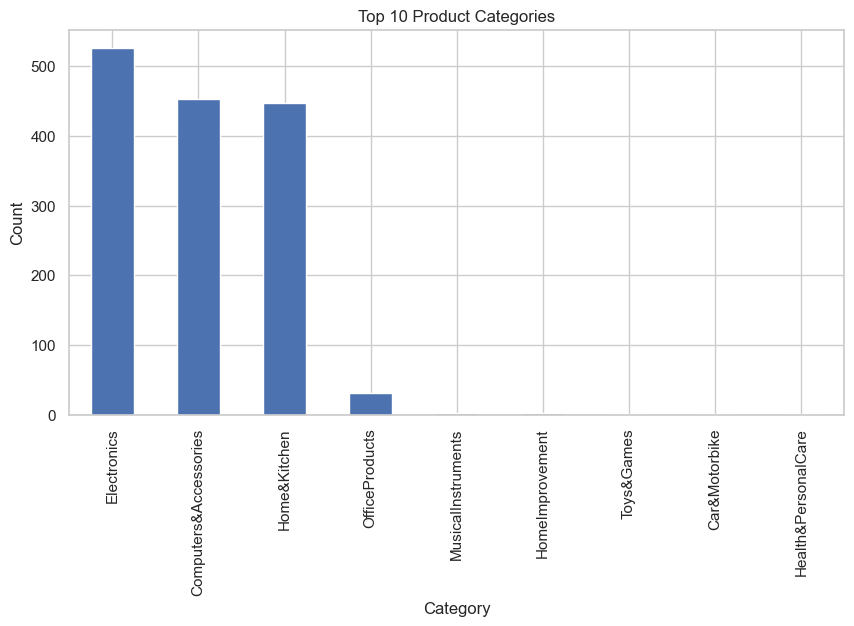

In [5]:
plt.figure(figsize=(10,5))
df['category_main'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Product Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


### Distribution of prices

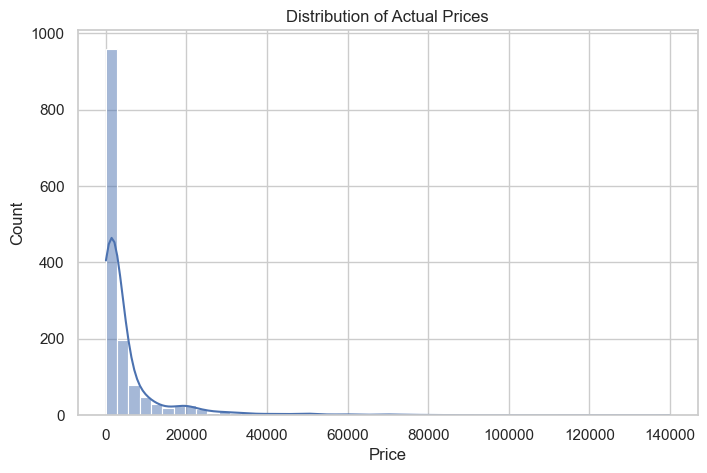

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['actual_price_num'], bins=50, kde=True)
plt.title("Distribution of Actual Prices")
plt.xlabel("Price")
plt.show()


### Distribution of discount percentage

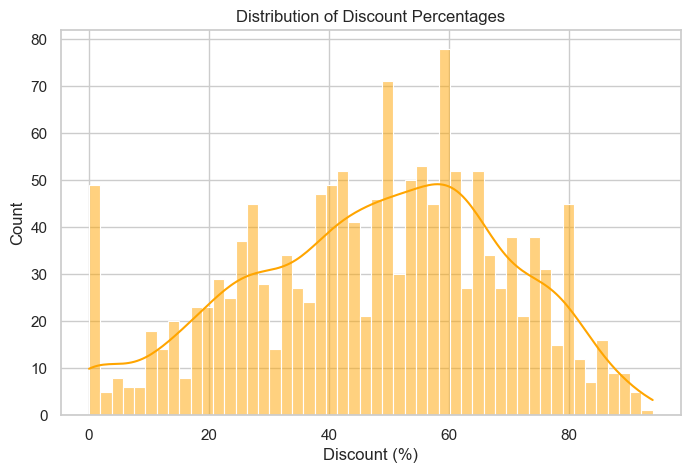

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['discount_pct_num'], bins=50, kde=True, color="orange")
plt.title("Distribution of Discount Percentages")
plt.xlabel("Discount (%)")
plt.show()


### Distribution of ratings

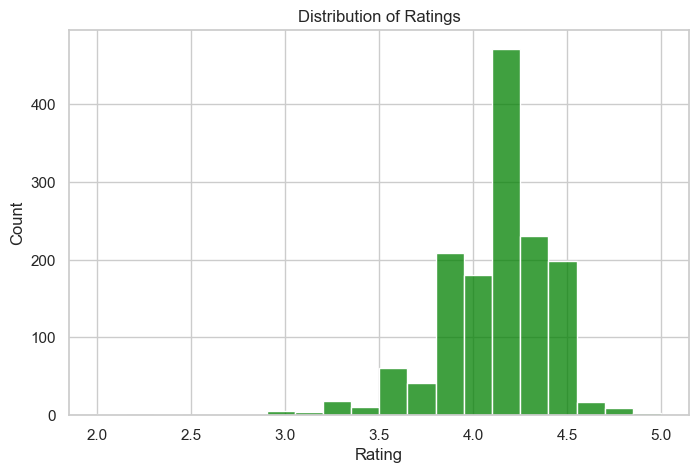

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['rating_num'], bins=20, kde=False, color="green")
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.show()


### Relationship between discount and popularity

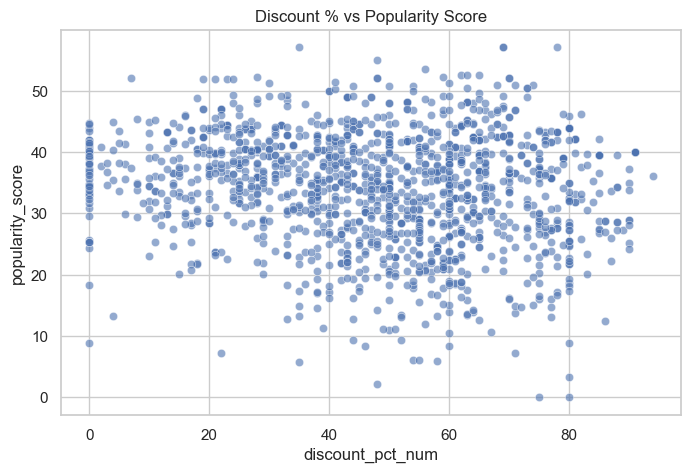

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="discount_pct_num", y="popularity_score", alpha=0.6)
plt.title("Discount % vs Popularity Score")
plt.show()


### Boxplot of ratings by category

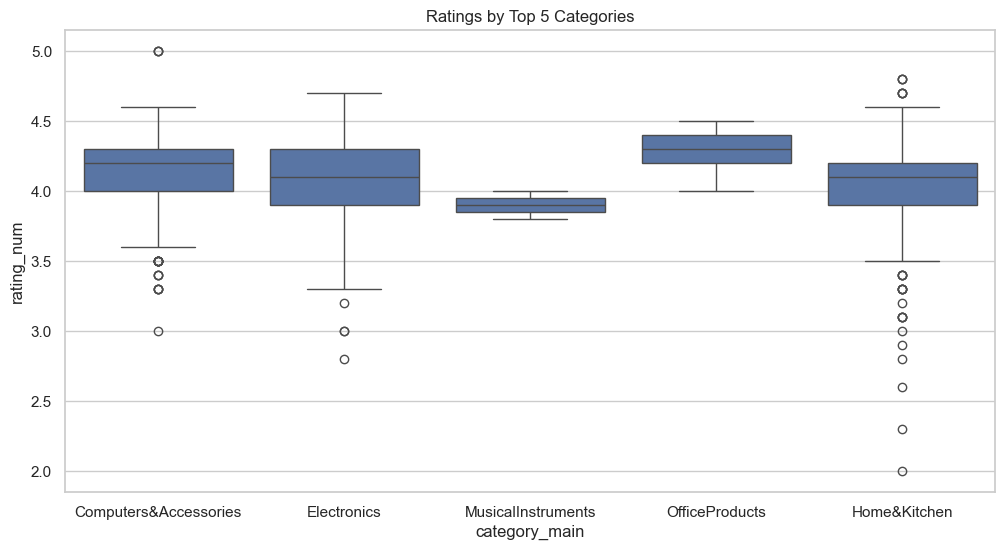

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['category_main'].isin(df['category_main'].value_counts().head(5).index)],
            x="category_main", y="rating_num")
plt.title("Ratings by Top 5 Categories")
plt.show()


### Outlier Detection

# Outlier Detection - Boxplots

Boxplots help visualize outliers quickly.

- Long whiskers or isolated dots indicate potential outliers.
- For `rating_count_num`, we expect extreme outliers (popular products with very high review counts).
- For `actual_price_num` and `discounted_price_num`, extreme high values may represent data entry errors or luxury products.


In [12]:
# Load processed dataset
import pandas as pd

df = pd.read_csv("../data/processed/amazon_sales_processed.csv")

# Select numerical columns for outlier detection
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols


Index(['actual_price_num', 'discounted_price_num', 'discount_pct_num',
       'rating_num', 'rating_count_num', 'discount_pct_calc',
       'discount_pct_diff', 'discount_amount', 'popularity_score'],
      dtype='object')

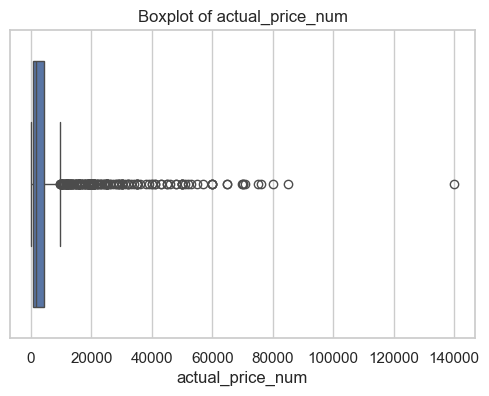

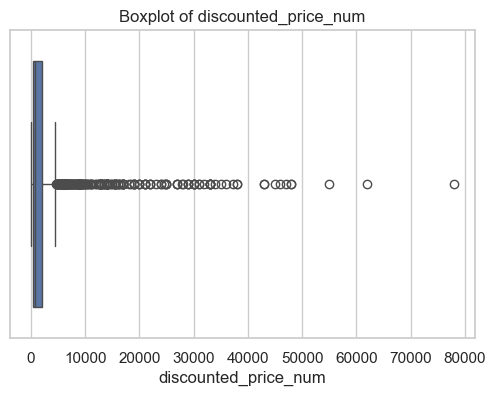

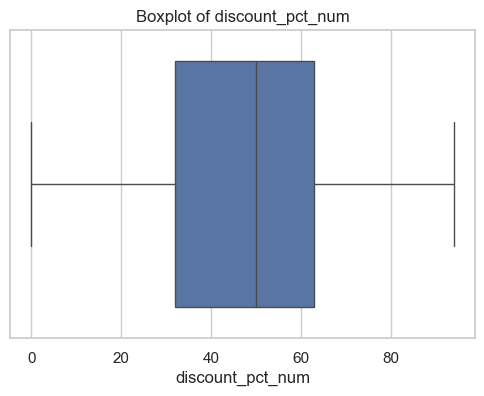

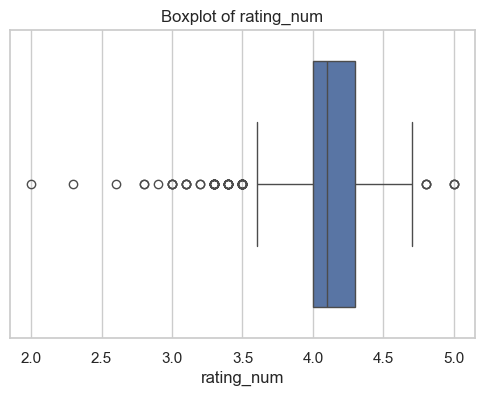

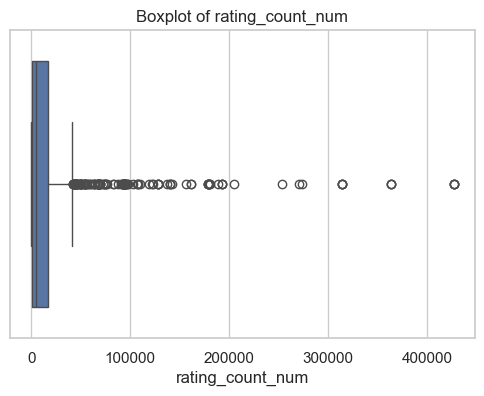

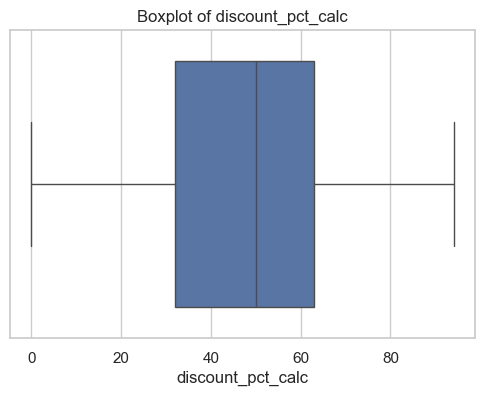

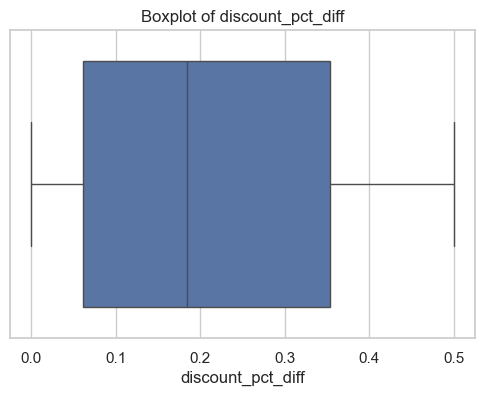

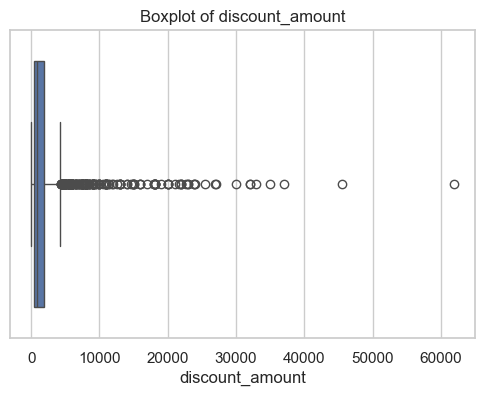

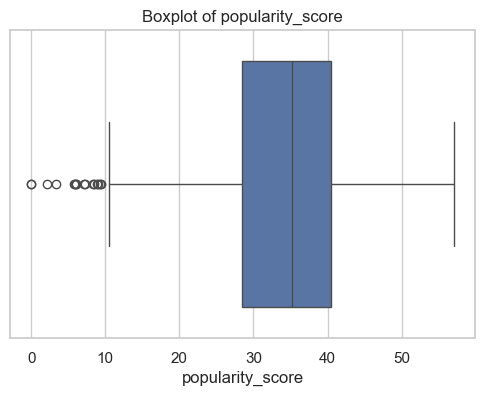

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


### Z-Score Method for Outlier Detection

We’ll calculate z-scores for each numerical column.  
Any value with a z-score > 3 (or < -3) is considered an outlier.


In [14]:
from scipy.stats import zscore

# Calculate z-scores
z_scores = df[num_cols].apply(zscore)

# Identify outliers
outliers = (z_scores.abs() > 3).sum()
outliers


actual_price_num        37
discounted_price_num    43
discount_pct_num         0
rating_num               0
rating_count_num         0
discount_pct_calc        0
discount_pct_diff        0
discount_amount         36
popularity_score         8
dtype: int64

# Step 3.1: Correlation Heatmap

A correlation heatmap helps us understand relationships between numerical variables.  
High positive or negative correlations might indicate redundancy or strong dependencies.  
This can guide feature selection later.


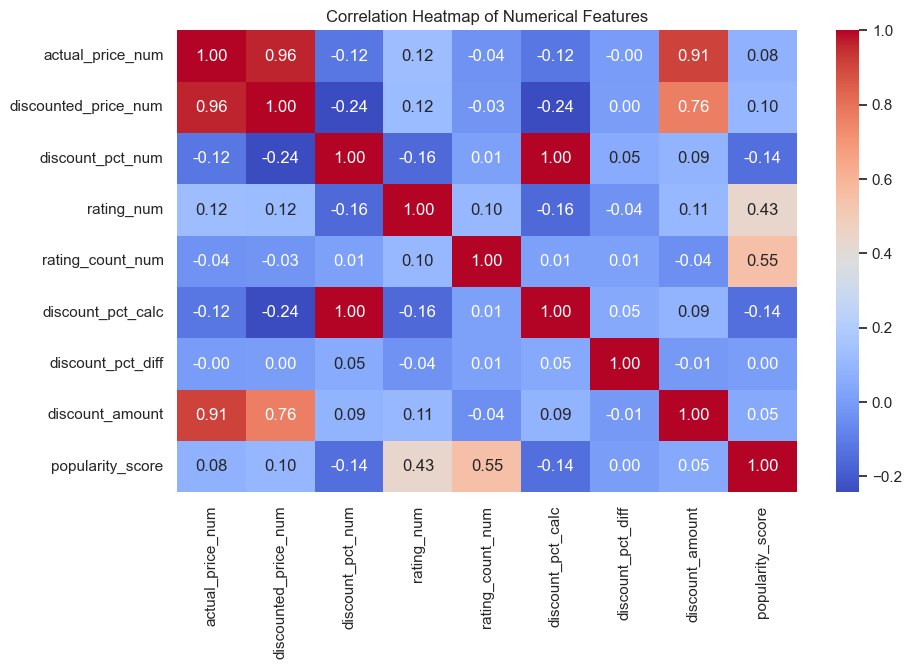

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


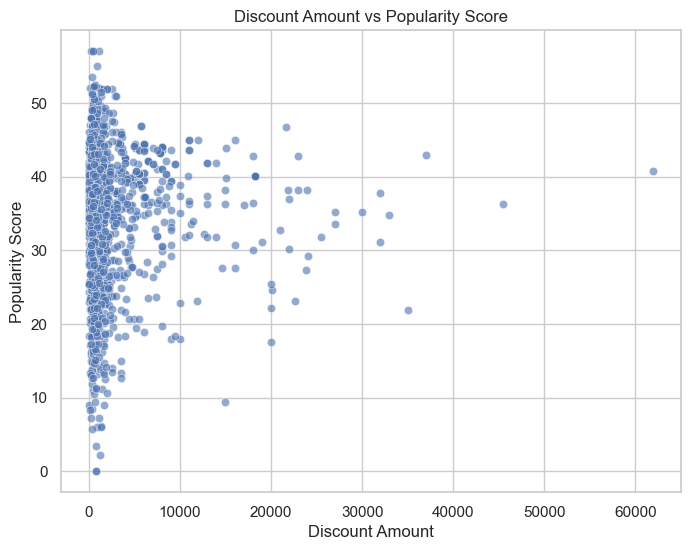

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="discount_amount", y="popularity_score", data=df, alpha=0.6)
plt.title("Discount Amount vs Popularity Score")
plt.xlabel("Discount Amount")
plt.ylabel("Popularity Score")
plt.show()


C:\Users\91969\AppData\Local\Temp\ipykernel_86536\1303832556.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="category_main", y="rating_num", data=df, ci=None)


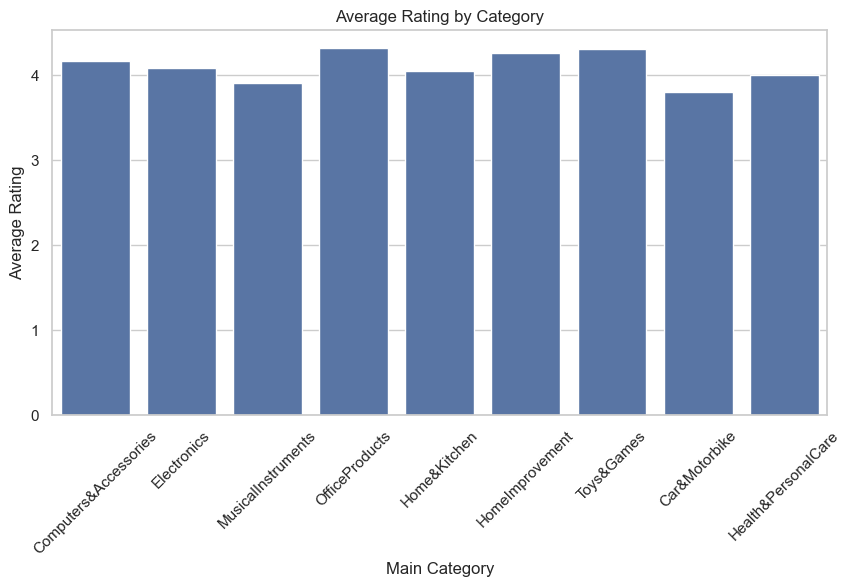

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x="category_main", y="rating_num", data=df, ci=None)
plt.title("Average Rating by Category")
plt.xlabel("Main Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


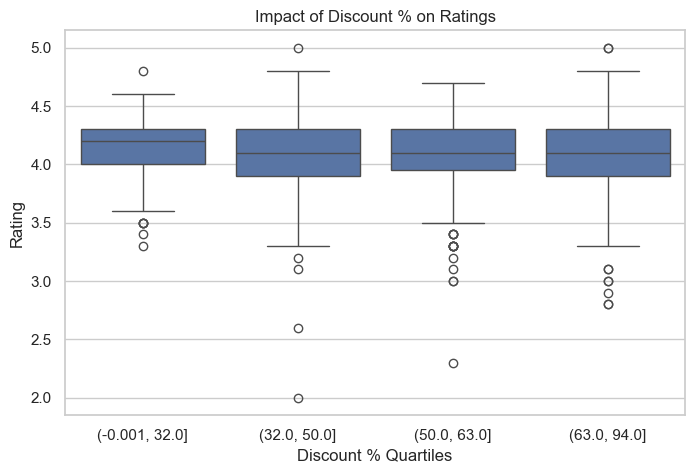

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x=pd.qcut(df["discount_pct_num"], q=4), y="rating_num", data=df)
plt.title("Impact of Discount % on Ratings")
plt.xlabel("Discount % Quartiles")
plt.ylabel("Rating")
plt.show()
